In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
b= sns
sns.set_theme(style="whitegrid") 
color=sns.color_palette("husl", 6)


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Data science/job_tests/Ai bees/comments_generator_data/news_post_comment.csv' , encoding = "ISO-8859-1")

In [ ]:
df.head()

,username,date,time,company,category,post,comment
0,trhk_p_0,10/12/2010,8:54:42,apple,business,Quarterly profits at US media giant TimeWarne...,Ad sales boost Time Warner profit
1,studiooctan,10/27/2010,17:35:24,apple,business,The dollar has hit its highest level against ...,Dollar gains on Greenspan speech
2,farahwahidabr,10/8/2010,13:21:50,apple,business,The owners of embattled Russian oil giant Yuk...,Yukos unit buyer faces loan claim
3,XatakaHome,9/22/2010,17:35:34,apple,business,British Airways has blamed high fuel prices f...,High fuel prices hit BA's profits
4,blanktae_04,10/27/2010,13:13:46,apple,business,Shares in UK drinks and food firm Allied Dome...,Pernod takeover talk lifts Domecq


In [ ]:
df.columns

Index(['username', 'date', 'time', 'company', 'category', 'post', 'comment'], dtype='object')

In [ ]:
df.category.value_counts()

sport            511
business         510
politics         417
tech             397
entertainment    386
Name: category, dtype: int64

In [ ]:
df.shape

(2221, 7)

In [ ]:
df.tail()

,username,date,time,company,category,post,comment
2216,GeekosityMag,5/28/2010,10:21:13,google,tech,Internet search engine users are an odd mix o...,Savvy searchers fail to spot ads
2217,yoncevadia,5/28/2010,16:31:09,google,tech,Internet TV has been talked about since the s...,TV's future down the phone line
2218,sharainsaw,5/28/2010,16:02:15,google,tech,Thousands of products and tens of thousands o...,Cebit fever takes over Hanover
2219,thorsragnar0k,5/25/2010,17:29:00,facebook,tech,Making games for future consoles will require...,New consoles promise big problems
2220,1970STARKS,5/27/2010,11:56:19,facebook,tech,BT is introducing two initiatives to help bea...,BT program to beat dialler scams


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  2221 non-null   object
 1   date      2221 non-null   object
 2   time      2221 non-null   object
 3   company   2221 non-null   object
 4   category  2221 non-null   object
 5   post      2221 non-null   object
 6   comment   2221 non-null   object
dtypes: object(7)
memory usage: 121.6+ KB


In [ ]:
df.isnull().sum()

username    0
date        0
time        0
company     0
category    0
post        0
comment     0
dtype: int64

In [ ]:
#df=df.drop_duplicates()

In [ ]:
#df=df.drop(['filename', 'location_id', 'page_url', 'area', 'area_marla', 'locality', 'agency', 'agent'],axis=1)

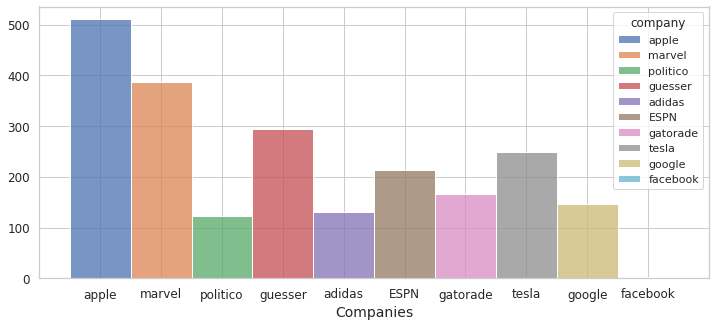

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
b = sns.histplot(x='company',data=df,ax=ax,hue="company",multiple='stack')
b.axes.set_title("",fontsize=24)
b.set_xlabel("Companies",fontsize=14)
b.set_ylabel("",fontsize=14)
b.tick_params(labelsize=12)


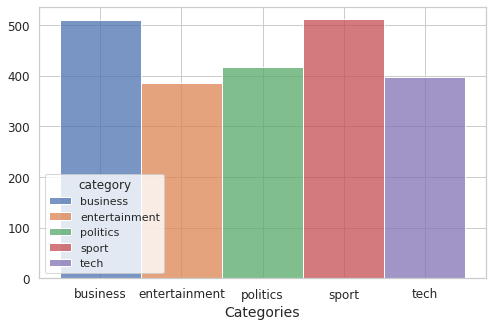

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
b = sns.histplot(x='category',data=df,ax=ax,hue="category",multiple='stack')
b.axes.set_title("",fontsize=24)
b.set_xlabel("Categories",fontsize=14)
b.set_ylabel("",fontsize=14)
b.tick_params(labelsize=12)


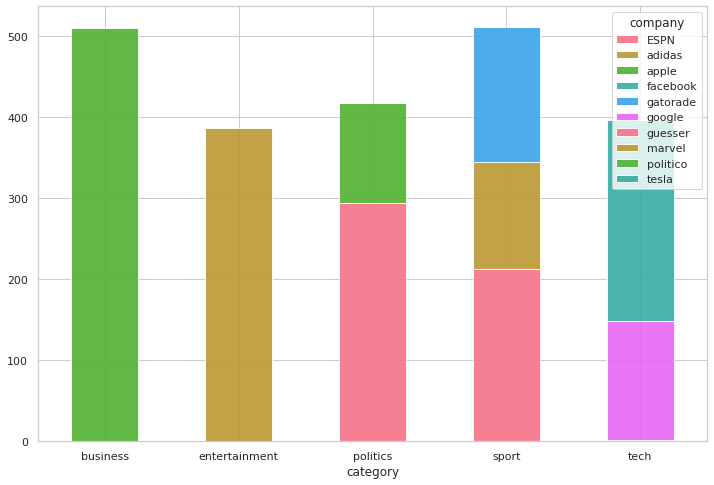

In [ ]:
pd.crosstab(index = df["category"],columns = df["company"]).plot(kind='bar',
                figsize=(12, 8),alpha=0.9,rot=0,stacked=True,title="", color=color)

6.0
4.0


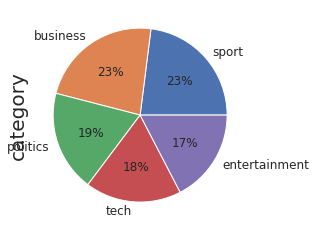

In [ ]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])
plt.rcParams.update({'font.size': 22})
plt.ylabel('',fontsize=20)
plot_size[0] = 10
plot_size[1] = 8
plt.rcParams["figure.figsize"] = plot_size 
df.category.value_counts().plot(kind='pie', autopct='%1.0f%%',textprops={'fontsize': 12})

# As you see above, category class is imblanced and it will be caused of overfitting or true prediction but actually false. I have to try resampling technique. 

In [ ]:
x = df[['category']]
y =df[['category']]

# Undersampling would be an ideal for my dataset instead of oversampling reason expension of rows and then we need to expand rest of classes rows.

In [ ]:
# import library
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)




/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_rus.shape,y_rus.shape

((1930, 1), (1930, 1))

Converting into dataframe so i could assign it to original dataset category column

In [ ]:
dfx= pd.DataFrame(  x_rus)
dfx.shape

(1930, 1)

In [ ]:
dfx.value_counts()

tech             386
sport            386
politics         386
entertainment    386
business         386
dtype: int64

after randome undersampling news rows are 1930, so assigning the x_rus dataframe rows and x_rus must be same.

In [ ]:
df= df.iloc[0:1930]

In [ ]:
df.shape

(1930, 7)

In [ ]:
df['category']= x_rus

10.0
8.0


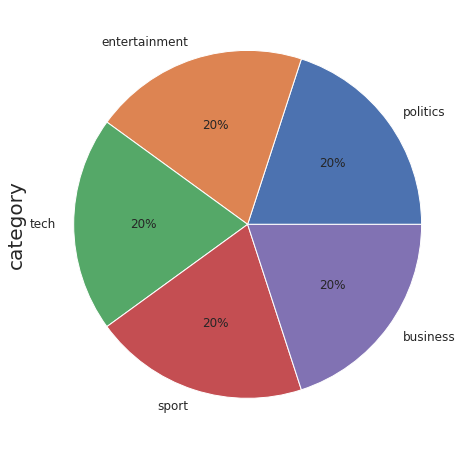

In [ ]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])
plt.rcParams.update({'font.size': 22})
plt.ylabel('',fontsize=20)
plot_size[0] = 10
plot_size[1] = 8
plt.rcParams["figure.figsize"] = plot_size 
df.category.value_counts().plot(kind='pie', autopct='%1.0f%%',textprops={'fontsize': 12})

# Now as you can see dataset class category is perfectly blanced.

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
import string

punct = string.punctuation
stopwords =list(STOP_WORDS)
def data_cleaning(sentence):
    doc = nlp(sentence)
    tokens =[]
    for token in doc:
        if token .lemma_ !="-PRON-":
            temp= token.lemma_.lower().strip()
        else: 
            temp= token.lower_
        tokens.append(temp)
    clean_tokens = []
    for token in tokens:
        if token not in stopwords and token not in  punct:
            clean_tokens.append(token)
    return clean_tokens

# implemntation of multiclass multioutput classification

In [ ]:
tfidf = TfidfVectorizer(tokenizer= data_cleaning)
tfidfc = TfidfVectorizer(tokenizer= data_cleaning)
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
svc = SVC()
svcc = SVC()
#model = MultiOutputClassifier(estimator=svc)
#print(model)

In [ ]:
#modelr = MultiOutputRegressor(GradientBoostingRegressor())

In [ ]:
x = df['post']
y = df['category']#,'comment']]
x.shape,y.shape

((1930,), (1930,))

In [ ]:
xc = df['category']
yc = df['comment']#,'comment']]
x.shape,y.shape

((1930,), (1930,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape , X_test.shape,y_train.shape,y_test.shape



((1544,), (386,), (1544,), (386,))

In [ ]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(xc, yc, test_size=0.2, random_state=42)
X_trainc.shape , X_testc.shape,y_trainc.shape,y_testc.shape



((1544,), (386,), (1544,), (386,))

In [ ]:
clf= Pipeline([('tfidf',tfidf),('clf',svc)])

In [ ]:
clfc= Pipeline([('tfidf',tfidfc),('clf',svcc)])

In [ ]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function data_cleaning at 0x7f6b345cd950>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0

In [ ]:
clfc.fit(X_trainc,y_trainc)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function data_cleaning at 0x7f6b345cd950>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0

In [ ]:
y_pred = clf.predict(X_test)
y_predc = clfc.predict(X_testc)

In [ ]:
svc_acc = round(clf.score(X_test,y_test)*100,2)
print('Text generator accuracy :',svc_acc,'%')
svcc_acc = round(clfc.score(X_testc,y_testc)*100,2)
print('Text generator accuracy :',svcc_acc,'%')

Text generator accuracy : 75.65 %
Text generator accuracy : 0.0 %


In [ ]:
print(clf.predict(["The boss of budget airline Ryanair has warned holiday prices are likely to rise sharply next year as consumer demand for travel rebounds."]))

['business']


In [ ]:
print(clfc.predict(["business"]))

['Singapore growth at 8.1% in 2004']


Increasing a size of ram

In [ ]:
#https://colab.research.google.com/drive/1GqZu6zmCy2vMNMZqO78DDuHvwv_9vJcp?usp=sharing

In [7]:
import numpy as np
import en_core_web_sm
import tensorflow as tf
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from spacy.lang.en.stop_words import STOP_WORDS
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.utils import to_categorical

nlp = en_core_web_sm.load()
lemmatizer = WordNetLemmatizer()
DISABLE_PIPELINES = ["tok2vec", "parser", "ner", "textcat", "custom", "lemmatizer"]
stopwords = STOP_WORDS

In [8]:
data = open('/content/drive/MyDrive/Data science/job_tests/Ai bees/comments_generator_data/twitter_posts.txt').read()

In [9]:
data[:100]

'?Ÿ???œ?Ÿ¬?Ÿ®?\x81??\x81????„¯??\x81??\x81??\x81??\x81????Apple Watch?\x81??\x81¯?\x81??\x81?‹¬\x81‹¬\x81 https://t.co/B1Dhhzpf7L\n"‡ú\x8f‚\xad\x8d'

In [10]:
corpus = data.lower().split("\n")

In [11]:
corpus[0:10]

['?ÿ???œ?ÿ¬?ÿ®?\x81??\x81????„¯??\x81??\x81??\x81??\x81????apple watch?\x81??\x81¯?\x81??\x81?‹¬\x81‹¬\x81 https://t.co/b1dhhzpf7l',
 '"‡ú\x8f‚\xad\x8d3,000,000†??š???ÿ¯@nimasojp?\x81?9‘??‚?\x90†??????ÿ??ÿ??ÿ? #‚\x81?†?«?\x81?†?§„¬??\x81? ?\x81®†\x8f?†?ÿ?\x81??\x81??\x81??\x81???? ???\x81š??šñ¦š\x8f?š??†?\x81‹¬?#iphone2021 ‘?ø‘??‡????\x81apple watch?\x81¦?\x81?‡??????\x81ÿ?\x81\x8f?\x81??????? nimaso?\x81?‘?øšœ«†?\x81?ÿ¦?ÿ¦?ÿ¬??????‘\x9d«?\x81??\x81¨?\x81®?\x81??\x81??\x81??\x81??\x81????10/31?\x81??\x81???? ????ÿ??ÿ??ÿ?‹¬?https://t.co/xakb2sv7j9"',
 '@rachel_12_wb ?\x81\x9d?\x81?‹¬\x81apple?\x81?šýú?\x81?‘???\x81®?\x81??\x81\x8d?????????',
 'el proximo martes 14 es la presentaci??n de los nuevos productos de apple con ganas de ver con lo que nos trae este a?ño!',
 'apple watch sport loop (44mm) ƒ?? plum ƒ???ÿregular https://t.co/v5rkjx8ru9',
 'apple announced the iphone 13 will have bigger batteries and quicker chargingƒ??weƒ??ll see about that',
 '@awesomeadamtv apple ??\x8d?',
 'ret

In [14]:
tok = Tokenizer()


In [15]:
tok.fit_on_texts(corpus)

In [16]:
total_words = len(tok.word_index) + 1 #1 for out of vocabulary 

In [17]:
total_words

13502

In [18]:
input_sequences = []
for line in corpus:
	token_list = tok.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [19]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

https://jovian.ai/gitrohitjain/nlp-poem-generation

In [20]:
input_sequences[0,:]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  8, 99], dtype=int32)

In [21]:
print(input_sequences[0, :-1],'\t\t', input_sequences[0, -1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 8] 		 99


In [22]:
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys =tf.keras.utils.to_categorical(labels, num_classes=total_words)

crashed on news_post.txt (bbc news dataset). This is jovian implementation technique to build lstm model, unfortunately it is creashed. It may be long text file or may be this text file need more data cleaning process.

In [23]:
labels[0],ys[0, 0:13]

(99,
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [24]:
model = Sequential()
model.add(Embedding(total_words, 240, input_length=max_sequence_len-1)) #max_sequence_len-1 because the last sequence code is taken as label i.e. input_sequences[:,-1]
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))

adam = Adam(lr=0.01)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [25]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=1,batch_size=256 ,verbose=1)
#print model.summary()
print(model)

237/237 [==============================] - 930s 4s/step - loss: 6.9303 - accuracy: 0.1354


In [26]:
seed_text = "cricket"
next_words = 10
  
for _ in range(next_words):
    token_list = tok.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted = np.argmax(predicted, axis =1)


    output_word = ""
    for word, index in tok.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text = seed_text + " " + output_word

print(seed_text)

cricket apple         


In [ ]:
raw_text= open('/content/drive/MyDrive/Data science/job_tests/Ai bees/comments_generator_data/only_posts.txt').read()

In [ ]:
import numpy
from keras.utils import np_utils
raw_text = raw_text.lower()
# create mapping of unique chars to integers, and a reverse mapping
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print('Total Patterns: ', n_patterns)
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)
# define the LSTM model


Total Characters:  372639
Total Vocab:  104
Total Patterns:  372539


In [ ]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(X, y, epochs=100, verbose=1)
#print model.summary()
print(model)

In [ ]:
import string
def clean_data(doc):
  tokens = doc.split()
  table = str.maketrans('', '', string.punctuation)
  tokens = [w.translate(table) for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  tokens = [word.lower for word in tokens]
  return tokens

In [ ]:
tokens= clean_data(data)
print(tokens[:20])

len(tokens)

len(set(tokens))


length = 50 -1

lines = []
for i in range(length, len(tokens)):
  seq = tokens[i-length:i]
  line = ' '.join([str(i) for i in seq])
  lines.append(line)
  if i > 200000:
    break
 

[<built-in method lower of str object at 0x7fc3ae342570>, <built-in method lower of str object at 0x7fc3ae3425b0>, <built-in method lower of str object at 0x7fc3ae3425f0>, <built-in method lower of str object at 0x7fc3ae342670>, <built-in method lower of str object at 0x7fc3ae3426b0>, <built-in method lower of str object at 0x7fc3ae3426f0>, <built-in method lower of str object at 0x7fc3ae342730>, <built-in method lower of str object at 0x7fc3ae342770>, <built-in method lower of str object at 0x7fc3ae3427b0>, <built-in method lower of str object at 0x7fc3ae3427f0>, <built-in method lower of str object at 0x7fc3ae342830>, <built-in method lower of str object at 0x7fc3ae342870>, <built-in method lower of str object at 0x7fc3ae3428b0>, <built-in method lower of str object at 0x7fc3ae3428f0>, <built-in method lower of str object at 0x7fc3ae342930>, <built-in method lower of str object at 0x7fc3ae342970>, <built-in method lower of str object at 0x7fc3ae3429b0>, <built-in method lower of str 

In [ ]:
print(len(lines))

42694


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)

sequences = tokenizer.texts_to_sequences(lines)

sequences = np.array(sequences)

In [ ]:
X, y = sequences[:,:-1], sequences[:,-1]
tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
y= to_categorical(y,num_classes=vocab_size)

In [ ]:
seq_length = X.shape[1]

In [ ]:
# model = Sequential()
# model.add(Embedding(vocab_size,50, input_length=seq_length))
# model.add(LSTM(100, return_sequences=True))
# model.add(LSTM(100))

# model.add(Dense(100, activation='relu'))
# model.add(Dense(vocab_size, activation='softmax'))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


ValueError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 440, 50)           2071050   
_________________________________________________________________
lstm (LSTM)                  (None, 440, 100)          60400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 41421)             4183521   
Total params: 6,405,471
Trainable params: 6,405,471
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, y, batch_size = 512, epochs=100)

Epoch 1/100
26/84 [========>.....................] - ETA: 7:21 - loss: 10.6329 - accuracy: 0.0104

**implementation by https://www.geeksforgeeks.org/**text-generation-using-recurrent-long-short-term-memory-network/ below

In [ ]:
from __future__ import absolute_import, division,print_function, unicode_literals
 
import numpy as np
import tensorflow as tf
 
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
 
from tensorflow.keras.optimizers import RMSprop
 
from keras.callbacks import LambdaCallback
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
import random
import sys, spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Storing all the unique characters present in the text
text= data_cleaning(data)
vocabulary = sorted(list(set(text)))

# Creating dictionaries to map each character to an index
char_to_indices = dict((c, i) for i, c in enumerate(vocabulary))
indices_to_char = dict((i, c) for i, c in enumerate(vocabulary))

print(vocabulary)


['""brazil', '(oops', '(„?¯š', '+15', '+9', '--', '--&gt', '-11', '-125', '-14', '-7', '-accent', '-college', '-olympics', '-pitt', '-retirement', '-sec', '-stephen', '-sudirman', '-the', '-vols', '-wedding', '..', '...', '....', '.....', '......', '........', '.@drkalibarrett', '.@googleindia', '.@hdr_uk', '.@jimmorrison', '.@nychealthsystem', '.@tesla', '.pick', '/long', '/music.jp', '/oricon', '/ototoy', '0', '0.00', '0.69', '0.8', '01248', '03', '04', '04:44', '08', '08-sep', '08/09', '08/09/2021', '08092021', '087761801272', '09', '1', '1)okita', '1,099', '1,300', '1,361', '1,500', '1.5', '1.571.260', '1.8', '1.liverpool', '1.sars~2002†', '1.š¨?„¯œ‡??š?', '1/2', '1/3', '10', '100', '100.000', '100.000tonnen', '10000', '1000x', '100‚?œ?\x81??\x81???›?ÿ??????¨??ú??›1‡???ÿ??ÿ?????ÿ??ÿÿ?ÿ?1?\x81??\x81??\x81??\x81?†??‡??‘?¯?\x81ý?\x81??\x81??\x81??\x81', '100„§§š???\x81??\x81?†›??\x81??\x81??\x81??\x81?????ÿ??ÿ?š???\x81?‚?ª‚?¨‚???\x81??\x81?????\x81œ?\x81?š???\x81œ?\x81??\x81??\x81??\x

In [ ]:
# Dividing the text into subsequences of length max_length
# So that at each time step the next max_length characters
# are fed into the network
max_length = 100
steps = 5
sentences = []
next_chars = []
for i in range(0, len(text) - max_length, steps):
	sentences.append(text[i: i + max_length])
	next_chars.append(text[i + max_length])
	
# Hot encoding each character into a boolean vector
X = np.zeros((len(sentences), max_length, len(vocabulary)), dtype = np.bool)
y = np.zeros((len(sentences), len(vocabulary)), dtype = np.bool)
for i, sentence in enumerate(sentences):
	for t, char in enumerate(sentence):
		X[i, t, char_to_indices[char]] = 1
	y[i, char_to_indices[next_chars[i]]] = 1


In [ ]:
# Building the LSTM network for the task
model = Sequential()
model.add(LSTM(128, input_shape =(max_length, len(vocabulary))))
model.add(Dense(len(vocabulary)))
model.add(Activation('softmax'))
optimizer = RMSprop(lr = 0.01)
model.compile(loss ='categorical_crossentropy', optimizer = optimizer,metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Helper function to sample an index from a probability array
def sample_index(preds, temperature = 1.0):
	preds = np.asarray(preds).astype('float64')
	preds = np.log(preds) / temperature
	exp_preds = np.exp(preds)
	preds = exp_preds / np.sum(exp_preds)
	probas = np.random.multinomial(1, preds, 1)
	return np.argmax(probas)


In [ ]:
# Helper function to generate text after the end of each epoch
def on_epoch_end(epoch, logs):
	print()
	print('----- Generating text after Epoch: % d' % epoch)

	start_index = random.randint(0, len(text) - max_length - 1)
	for diversity in [0.2, 0.5, 1.0, 1.2]:
		print('----- diversity:', diversity)

		generated = ''
		sentence = text[start_index: start_index + max_length]
		generated += sentence
		print('----- Generating with seed: "' + sentence + '"')
		sys.stdout.write(generated)

		for i in range(400):
			x_pred = np.zeros((1, max_length, len(vocabulary)))
			for t, char in enumerate(sentence):
				x_pred[0, t, char_to_indices[char]] = 1.

			preds = model.predict(x_pred, verbose = 0)[0]
			next_index = sample_index(preds, diversity)
			next_char = indices_to_char[next_index]

			generated += next_char
			sentence = sentence[1:] + next_char

			sys.stdout.write(next_char)
			sys.stdout.flush()
		print()
print_callback = LambdaCallback(on_epoch_end = on_epoch_end)


In [ ]:
# Defining a helper function to save the model after each epoch
# in which the loss decreases
filepath = "/content/drive/MyDrive/Data science/job_tests/Ai bees/comments_generator_data/weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor ='loss',
							verbose = 1, save_best_only = True,
							mode ='min')


In [ ]:
# Defining a helper function to reduce the learning rate each time
# the learning plateaus
reduce_alpha = ReduceLROnPlateau(monitor ='loss', factor = 0.2,
							patience = 1, min_lr = 0.001)
callbacks = [print_callback, checkpoint, reduce_alpha]


In [ ]:
# Training the LSTM model
model.fit(X, y, batch_size = 128, epochs = 5, callbacks = callbacks)


Epoch 1/5


NameError: ignored